___
# Ciência dos Dados - PROJETO 3 - INSPER

___
## Nome 1 - Augusto Franco de Paula

## Nome 2 - Gabriel Heusi Pereira Bueno de Camargo

## Nome 3 - Pedro Henrique Carvalho Daher

___

___

## INTRODUÇÃO

        A partir de um interesse sobre carros, o grupo optou por fazer um modelo de previsão dos preços de carros e ainda analisar aqueles considerados "Overpriced", ou seja acima do preço considerado padrão para determinado modelo. 
        A base de dados utilizada para o estudo é de 2017 e avalia apenas carros americanos, dessa forma deve-se explorar esta afim de possibilitar tal modelo de predição. Para isso será importante avaliar quais as variáveis de maior influência sobre o preço de um carro para que ao fim haja uma comparação entre o preço real do carro e seu preço esperado a partir das variáveis que o definem. Por fim a análise de carros acima do preço servirá como dado de eficiência do estudo 
        Dessa forma baseou-se em artigos cientificos e estudos que avaliam os modelos de distribuicão destes preços, entre eles estão: 

___
## MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import os
import math
from sys import stdin
from numpy import arange
import numpy as np
import seaborn as sns
from sklearn import preprocessing, cross_validation, neighbors

In [57]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())
data = pd.read_csv('data.csv')


Esperamos trabalhar no diretório
C:\Users\Augusto\Desktop\DP Ciência dos Dados\Projeto3


### BASE DE DADOS

In [58]:
data = shuffle(data)
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
5311,Mercedes-Benz,GLE-Class Coupe,2016,premium unleaded (required),577.0,8.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Factory Tuner,Luxury,High-Performance",Midsize,4dr SUV,18,14,617,109300
7241,Dodge,Nitro,2010,regular unleaded,210.0,6.0,AUTOMATIC,rear wheel drive,4.0,Crossover,Midsize,4dr SUV,22,16,1851,23235
201,Mitsubishi,3000GT,1999,regular unleaded,320.0,6.0,MANUAL,all wheel drive,2.0,"Hatchback,Factory Tuner,Performance",Compact,2dr Hatchback,22,16,436,7600
4733,Ford,Five Hundred,2006,regular unleaded,203.0,6.0,AUTOMATIC,all wheel drive,4.0,NaN,Large,Sedan,23,17,5657,28230
8778,Chevrolet,S-10,2003,flex-fuel (unleaded/E85),120.0,4.0,MANUAL,rear wheel drive,2.0,Flex Fuel,Compact,Regular Cab Pickup,25,19,1385,14770


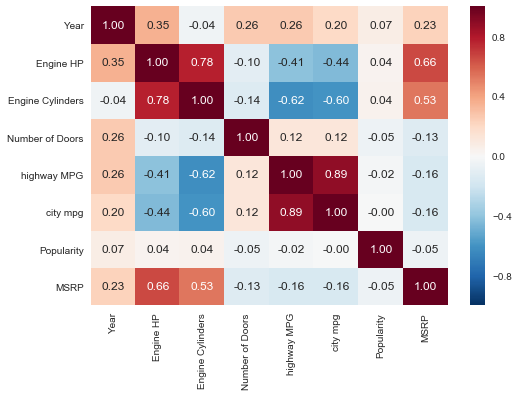

In [59]:
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

A partir do mapa mostrado acima é possível identificar a influência (correlação) de uma variável sobre o preço de um carro. Dessa forma basta analisar e perceber que as três que apresentam maior proporcionalidade são: Ano de fabricação (Year), Potência do Motor (Engine HP) e número de cilindros (Engine Cylinders). Vale lembrar que isto era esperado, afinal essa ferramenta só é capaz de comparar dados quantitativos.

### Análise Descritiva

A partir desta seção será reavaliada a ideia das variáveis e sua distribuição de acordo com o preço. Como por exemplo a "Engine Cylinders" será categorizado como uma espécie de força fornecida pelos cilindros ao carro e ainda observar onde a predominância do preço dos carros, separando em faixas de valor de compra/venda. 

In [60]:
data = data.loc[data['Engine Cylinders']>0,['Year','Engine HP','Engine Cylinders','MSRP']]
data = data.loc[data['MSRP']<125000,['Year','Engine HP','Engine Cylinders','MSRP']]
data = data.loc[data['Engine HP']>0,['Year','Engine HP','Engine Cylinders','MSRP']]
data.columns=["Ano","Potência","Cilindros","Price"]
data.dropna()

,Ano,Potência,Cilindros,Price
5311,2016,577.0,8.0,109300
7241,2010,210.0,6.0,23235
201,1999,320.0,6.0,7600
4733,2006,203.0,6.0,28230
8778,2003,120.0,4.0,14770
4182,2009,177.0,4.0,29645
6206,2016,283.0,6.0,29795
7141,1993,160.0,6.0,2000
9611,2017,285.0,6.0,42075
923,2015,400.0,6.0,105630


In [61]:
#data.Price.describe()

In [62]:
faixa = range(5000,80000,3000)
price = pd.cut(data.Price, bins=faixa)
price.value_counts(sort=False, normalize=True)*100

(5000, 8000]       0.291545
(8000, 11000]      0.205161
(11000, 14000]     0.831444
(14000, 17000]     4.459562
(17000, 20000]     6.046863
(20000, 23000]     9.405032
(23000, 26000]    11.186697
(26000, 29000]    10.538819
(29000, 32000]    10.679192
(32000, 35000]     8.638376
(35000, 38000]     7.482993
(38000, 41000]     6.165641
(41000, 44000]     5.344995
(44000, 47000]     4.070835
(47000, 50000]     3.358169
(50000, 53000]     2.569917
(53000, 56000]     1.997624
(56000, 59000]     1.241767
(59000, 62000]     1.382140
(62000, 65000]     1.446928
(65000, 68000]     0.950221
(68000, 71000]     0.701868
(71000, 74000]     0.442717
(74000, 77000]     0.561494
Name: Price, dtype: float64

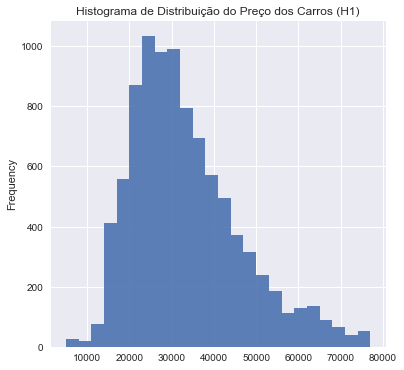

In [63]:
plot = data.Price.plot.hist(bins=faixa,title='Histograma de Distribuição do Preço dos Carros (H1)', figsize=(6, 6), alpha=0.9)
plt.show()

Histograma que possibilita a visualização da distribuição dos preços dos carros

In [64]:
from sklearn.model_selection import train_test_split as split
train, test = split(data, test_size=0.3)
train.describe()

,Ano,Potência,Cilindros,Price
count,7914.000000,7914.000000,7914.000000,7914.000000
mean,2010.263331,236.582638,5.450847,31362.544225
std,7.734335,91.875278,1.456361,20448.417425
min,1990.000000,62.000000,3.000000,2000.000000
25%,2006.000000,170.000000,4.000000,20416.250000
50%,2015.000000,220.000000,6.000000,29352.500000
75%,2016.000000,290.000000,6.000000,40007.500000
max,2017.000000,707.000000,12.000000,124100.000000


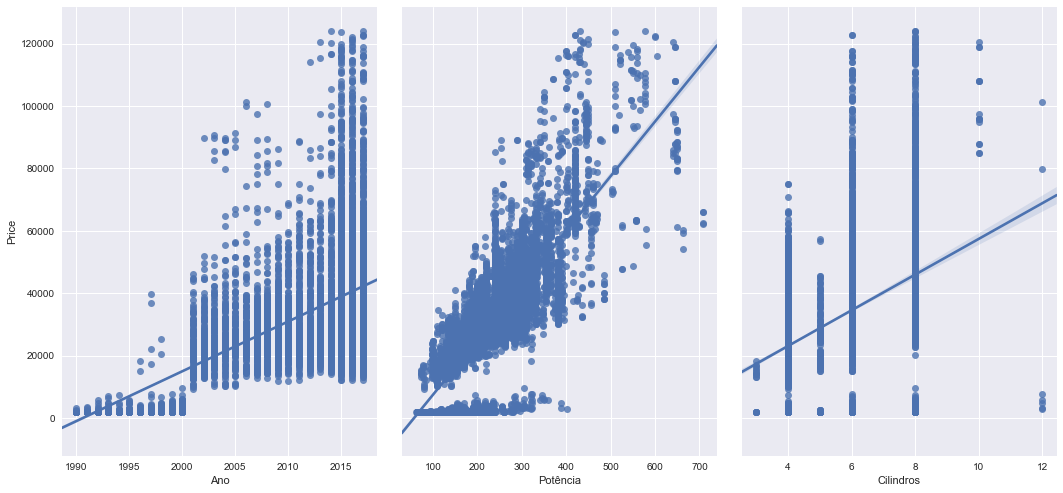

In [65]:
import seaborn as sns
%matplotlib inline
h = sns.pairplot(train,x_vars=minhascolunas,y_vars="Price",size=7,aspect=0.7,kind = 'reg')
plt.show()

___
## MODELOS DE PREDIÇÃO

[O tópico C.PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO estará dentro deste tópico. Organize-o aqui de forma clara!]

[ORGANIZE AQUI TODOS OS MODELOS DE PREDIÇÃO NECESSÁRIOS NESTE PROJETO!]

o MODELO DE PREDIÇÃO PELA MÉDIA

o MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression)

o MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)

o MODELO DE ÁRVORES DE REGRESSÃO (Decision Tree Regression)

## MODELO DE PREDIÇÃO PELA MÉDIA

### O primeiro modelo de predição realizado foi pela média, que consiste basicamente na análise da média da variável que esperamos prever, no caso o preço dos carros. Para isso basta analisar a média de preços e essa será o valor esperado para o carro

In [66]:
print('O preço esperado de um carro a partir da predição pela média é:',train.Price.mean())

O preço esperado de um carro a partir da predição pela média é: 31362.544225423302


### Coeficiente de determinação (R2) e Raiz do erro médio quadrático (RMS)

In [67]:
n = len(train)
fi = train.Price.mean()
ybarra = train.Price.mean()
yi=train.Price

def R2treino (ybarra, fi, yi):
    a = ((yi-fi)**2).sum()
    b = ((yi-ybarra)**2).sum()
    r2=1-(a/b)
    return[r2]

def RSMtreino (ybarra, fi, yi):
    c = ((yi-ybarra)**2).sum()
    raiz = ((1/n)*c)**0.5
    return[raiz]
    
print (R2treino(ybarra, fi, yi))
print (RSMtreino(ybarra, fi, yi))


[0.0]
[20447.12546955033]


In [68]:
n = len(test)
fi = test.Price.mean()
ybarra = test.Price.mean()
yi=test.Price

def R2teste (ybarra, fi, yi):
    a = ((yi-fi)**2).sum()
    b = ((yi-ybarra)**2).sum()
    r2=1-(a/b)
    return[r2]

def RSMteste (ybarra, fi, yi):
    c = ((yi-ybarra)**2).sum()
    raiz = ((1/n)*c)**0.5
    return[raiz]
    
print (R2teste(ybarra, fi, yi))
print (RSMteste(ybarra, fi, yi))

[0.0]
[20839.58169973698]


In [69]:
Qualidade = 20350/21046
print('A qualidade deste modelo é de', Qualidade)
print('Neste modelo, R2train = R2test')
print('Não está "overfiting" pois RSMtrain/RMStest < 1. ')

A qualidade deste modelo é de 0.9669295828185879
Neste modelo, R2train = R2test
Não está "overfiting" pois RSMtrain/RMStest < 1. 


## MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression)

### A seguir deve ser feito um segundo modelo de predição, no caso o chamado K-Nearest Neighbors Regression, que consiste basicamente em prever o valor do carro baseado em seus vizinhos mais próximos e seus atributos (exceto preço, já que este é usado para o cálculo da média). Isto é, este modelo se fundamenta em descobrir o valor do preço através de uma média dos preços de seus k vizinhos mais próximos. Para determinar quais são os vizinhos mais próximos, um cáclulo é feito e os vizinhos são selecionados.

In [70]:
x = np.array(data.drop(['Price'],1))
y = np.array(data['Price'])

x_train, x_test,y_train, y_test=cross_validation.train_test_split(x,y,test_size=0.25)
clf=neighbors.KNeighborsClassifier()
clf.fit(x_train, y_train)
accuracy=clf.score(x_test, y_test)
print (accuracy)

0.0969225327202


### Na célula acima foi determinado o alvo à predição: "Price". A base train (25%) e test(75%) foi separada. Além disso uma nova ferramenta foi disposta para verificar a veracidade dos dados: "accuracy". Apesar do "accuracy estar próximo a 10%, o valor ("Price") deste modelo de regressão não ficou muito distante do valor ("Price") real.

In [71]:
ano = input('Digite o ano (2006 até 2017): ')
potencia = input("Digite a potencia (150 até 707): ")
cilindros = input("Digite a quantidade de cilindros (3 até 12): ")

ee=np.array([ano,potencia,cilindros])
ee=ee.reshape(1,-1)
prediction = clf.predict(ee)
print(prediction)

Digite o ano (2006 até 2017): 2010
Digite a potencia (150 até 707): 300
Digite a quantidade de cilindros (3 até 12): 6
[46830]


### Há aqui uma interação entre o usuário e o programa. Sendo que, através da célula acima e do modelo de ressão dos K-vizinhos mais próximos, o usuário é capaz de prever o preço de um carro digitando seu ano, sua potência e sua quantidade de cilindros.

### Coeficiente de determinação (R2) e Raiz do erro médio quadrático (RMS)

In [72]:
n = len(train)
fi = prediction
ybarra = train.Price.mean()
yi=train.Price

def R2 (ybarra, fi, yi):
    a = ((yi-fi)**2).sum()
    b = ((yi-ybarra)**2).sum()
    r2=1-(a/b)
    return[r2]

def RSM (ybarra, fi, yi):
    c = ((yi-ybarra)**2).sum()
    raiz = ((1/n)*c)**0.5
    return[raiz]
    
print (R2(ybarra, fi, yi))
print (RSM(ybarra, fi, yi))

[0.999733584210183]
[20447.12546955033]


In [73]:
n = len(test)
fi = prediction
ybarra = test.Price.mean()
yi=test.Price

def R2 (ybarra, fi, yi):
    a = ((yi-fi)**2).sum()
    b = ((yi-ybarra)**2).sum()
    r2=1-(a/b)
    return[r2]

def RSM (ybarra, fi, yi):
    c = ((yi-ybarra)**2).sum()
    raiz = ((1/n)*c)**0.5
    return[raiz]
    
print (R2(ybarra, fi, yi))
print (RSM(ybarra, fi, yi))

[0.9989362800005643]
[20839.58169973698]


In [74]:
QualidadeR2 = 0.9999259/0.9991925
print('A qualidade deste modelo é de', QualidadeR2)
print('Está "overfiting" pois R2train/R2test > 1. ')

A qualidade deste modelo é de 1.0007339926991046
Está "overfiting" pois R2train/R2test > 1. 


## MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)

### O próximo modelo preditivo a ser realizado para análise dos preços de carro é pelo método de regressão linear múltipla, este se baseia na estimativa de uma variável desejada a partir de outras que tenham influência sobre àquela. Sendo que por se tratar de uma função linear os parâmetros se organizam em uma equação de mesma natureza, ou seja a dependência da variável alvo, no caso preço de um carro, depende de outras linearmente.  

In [75]:
from IPython.display import HTML, display
import statsmodels.api as sm
from statsmodels.formula.api import ols
Y = train['Price']
minhascolunas=['Ano','Potência','Cilindros']
X=train[['Ano','Potência','Cilindros']]
X=sm.add_constant(X)
model = sm.OLS(Y,X)
Tabelareg = model.fit()
Tabelareg_summary = Tabelareg.summary()
HTML(
(Tabelareg_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

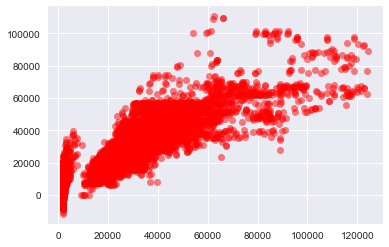

In [76]:
plt.plot(Y,Tabelareg.predict(X),'o',color='red',alpha=0.5
plt.show()

### Coeficiente de determinação (R2) e Raiz do erro médio quadrático (RMS)

___
## CONCLUSÃO

### Após todo o processo de análise da divisão de preços, por análise descritiva e modelos de predição o estudo foi capaz de mostrar como era a real influência de 3 variáveis no preço de um carro. As três variáveis escolhidas foram baseadas além de uma análise descritiva, mostrando como era o preço em função destas, mostrado pelos gráficos Price x Ano; Price x Potência e Price x Cilindros e pelo 'HeatMap' (figura 1), capaz de avaliar a correlação entre cada variável. Sendo assim pode-se concluir que as variáveis definidas como Ano, Potência e Cilindros (Número de Cilindros no motor do carro) eram as que apresentavam maior influência sobre o preço de um carro na base de dados do estudo, como mostrado no início deste na seção de mineração de dados e análise descritiva.
### Em seguida foi importante analisar entre faixas de preço, onde se dava a maior incidência dos carros, ou seja entre quais preços estava distribuído maior número de carros. A partir disso já era possível concluir o formato de distribuição, observando o gráfico do Histograma, pode-se concluir que há uma assimetria à direita positiva.
### A partir dessas conclusões iniciais partiu-se para a montagem de modelos de predição, entre eles: Modelo pela Média, K vizinhos mais próximos e de Regressão Linear. Para isso foi necessário antes dividir a base de dados inicial ('data') em teste e treinamento, e usar a de treinamento para cada um desses modelos. Por fim foi necessário analisar o coeficiente de determinação de cada e seu erro médio quadrático, conhecido por RMS. 
### O modelo inicial, de predição pela Média, basicamente mostra que o preço esperado de um carro na base de dados de treinamento é o valor médio dos preços e portanto apresenta uma análise superficial, tanto que seu coeficiente de determinação é 0, e este se mostra eficiente quanto mais próximo de 1.
### O modelo de K-vizinhos mais próximos explicado em comentários durante o desenvolvimento do mesmo.
### O modelo de Regressão Linear escolhido foi por OLS e consiste em um modelo de regressão múltipla, afinal há 3 variáveis de influência para a variável alvo, o preço do carro. Este se apresenta mais eficiente e pode mostrar graficamente o comportamento entre preço esperado e preço real. Isso porque o modelo apresenta uma equação linear que abrange as 3 variáveis juntamente com seus coeficientes determinados pela tabela OLS (tabela 1) e assim pode-se criar uma lista com todos estes valores e posteriormente o gráfico da Regressão Linear, onde cada ponto representa o valor (Price) estimado quando os parâmetros 'Ano', 'Potência' e 'Cilindros' são levados em consideração para o cálculo

___
## REFERÊNCIAS BIBLIOGRÁFICAS

Site do qual retiramos a base de dados: https://www.kaggle.com/jshih7/car-price-prediction?scriptVersionId=584464/data

Estudo sobre o K-Nearest: http://scholarpedia.org/article/K-nearest_neighbor

Estudo sobre a Regressão Linear "Ridge": http://repositorio.unicamp.br/bitstream/REPOSIP/306421/1/Reynaldo_Cristiane_M.pdf